In [1]:
import requests
from bs4 import BeautifulSoup
from langchain_openai import ChatOpenAI
from langchain_core.tools import tool
from langchain.agents import initialize_agent
from langchain.agents import AgentType
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.schema import Document

In [2]:
# 读取网页内容
def load_webpage(url: str):
    response = requests.get(url)
    response.raise_for_status()  # 确保请求成功
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # 提取文本内容（可以根据需要调整）
    paragraphs = soup.find_all('p')
    text = "\n".join([para.get_text() for para in paragraphs])
    return text

# 读取网页链接
url = "https://medium.com/@libro.development/libro-a-customizable-ai-notebook-ab31bd4197b9"  # 替换为你想读取的网页链接
webpage_content = load_webpage(url)

In [3]:
pip install faiss-cpu

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [4]:
from langchain.schema import Document

# 文本分割
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)
chunks = text_splitter.split_text(webpage_content)

# 创建文档对象列表
documents = [Document(page_content=chunk) for chunk in chunks]

# 创建向量存储
embeddings = OpenAIEmbeddings()
vector_store = FAISS.from_documents(documents, embeddings)

/var/folders/np/009dffqj74vbz89c1xghgskh0000gp/T/ipykernel_61692/719554337.py:11: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embeddings = OpenAIEmbeddings()


In [5]:
# 创建一个RAG工具
@tool
def rag_query(query: str) -> str:
    """
    This function retrieves relevant information from the loaded webpage data
    and generates a response using the language model.

    :param query: The user's query
    :return: The generated response based on the retrieved information
    """
    # Assuming `vector_store` and `llm` are accessible in the scope
    relevant_docs = vector_store.similarity_search(query)
    context = "\n".join([doc.page_content for doc in relevant_docs])
    response = llm(f"{context}\n\nUser: {query}\nAssistant:")
    return response

# 设置语言模型
llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)

# 定义工具
tools = [rag_query]

# 初始化代理
agent = initialize_agent(
    tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True
)

/var/folders/np/009dffqj74vbz89c1xghgskh0000gp/T/ipykernel_61692/2518069785.py:30: LangChainDeprecationWarning: The function `initialize_agent` was deprecated in LangChain 0.1.0 and will be removed in 1.0. Use :meth:`~Use new agent constructor methods like create_react_agent, create_json_agent, create_structured_chat_agent, etc.` instead.
  agent = initialize_agent(


In [6]:
import sys
sys.path.append("/Users/johnny/Code/difizen/magent/packages/magent-ui-langchain/src")

from magent_ui_langchain import launch
# launch(agent)

INFO:     Current log level is
INFO:     Started server process [61692]
INFO:     Waiting for application startup.
INFO:     Server is running at http://localhost:9563/


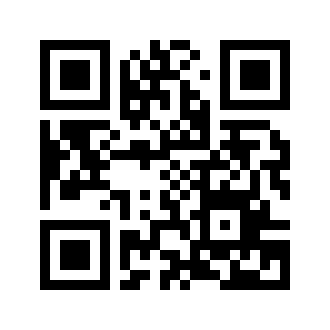

INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:9563 (Press CTRL+C to quit)


INFO:     127.0.0.1:60031 - "GET / HTTP/1.1" 307 Temporary Redirect
INFO:     127.0.0.1:60031 - "GET /app/ HTTP/1.1" 200 OK
INFO:     127.0.0.1:60032 - "GET / HTTP/1.1" 307 Temporary Redirect
INFO:     127.0.0.1:60032 - "GET /app/ HTTP/1.1" 200 OK
INFO:     127.0.0.1:60204 - "GET / HTTP/1.1" 307 Temporary Redirect
INFO:     127.0.0.1:60204 - "GET /app/ HTTP/1.1" 200 OK
INFO:     127.0.0.1:60521 - "POST /api/v1/chat-stream HTTP/1.1" 200 OK


> Entering new None chain...
To answer the question about the characteristics of "libro," I need to gather relevant information about it. I will perform a query to find out more about the features or characteristics associated with "libro." 

Action: rag_query  
Action Input: "libro 特性"  

/var/folders/np/009dffqj74vbz89c1xghgskh0000gp/T/ipykernel_61692/2518069785.py:14: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = llm(f"{context}\n\nUser: {query}\nAssistant:")



Observation: content='Libro 是一个可定制的笔记本解决方案，专为支持生成式 AI 功能而设计。它提供了商业级的用户体验，能够无缝集成 AI，使其易于融入开发环境，构建前沿的 AI 和数据科学解决方案。以下是 Libro 的一些主要特性：\n\n1. **AI 工作流**：\n   - **Prompt Cells**：用户可以将 AI 集成到笔记本的执行逻辑中，实现无缝的 AI 工作流。\n   - **解释器模式**：用户可以使用自然语言与笔记本互动，生成所需的结果。\n\n2. **多种产品形式**：\n   - Libro 支持多种用例，既可以作为文档编辑器，也可以作为报告演示工具，随时轻松创建演示和报告。\n\n3. **轻松的数据集成**：\n   - 用户可以使用 SQL 单元轻松执行数据操作。简单的配置即可连接到自己的数据库，支持在 SQL 中使用 Python 上下文变量，并将查询结果继续作为数据框使用，确保数据工作流的顺畅和高效。\n\n4. **功能齐全的代码编辑器**：\n   - Libro 将继续利用其灵活性和易集成性，探索更多笔记本类产品的用例。将不断扩展对不同运行时的支持，并引入更好的交互体验控件，使 Libro 在用户体验方面成为最佳的笔记本产品。\n\n5. **开放框架**：\n   - Libro 提供开放框架，支持自定义 UI 和执行内核，允许在所有模块层进行二次开发和定制。\n\n6. **丰富的附加功能**：\n   - Libro 除了基本的笔记本功能外，还提供了丰富的附加功能，增强用户的工作体验。\n\n通过这些特性，Libro 旨在更好地满足数据和 AI 工作流的需求，推动基于笔记本的工作方式的未来发展。欢迎开发者参与构建 Libro 项目，更多信息请访问 [GitHub](https://github.com/difizen/libro) 或 [官方网站](https://libro.difizen.net/)。' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 468, 'prompt_tokens': 676, 'total_tokens': 114

In [ ]:
launch(agent)